In [10]:
import pandas as pd
df = pd.read_csv("Apr10FireProtDB_FeatGen_targetclass.csv")
df.head()

,protein_name,uniprot_id,ddG,secondary_structure,asa,b_factor,pH,sequence,Aliphatic Index,Instability index,Isoelectric point,Hydrophobicity,Aromaticity,MEC,Molecular weight,Fraction helix,Fraction turn,Fraction sheet,target_class
0,Interleukin-1 beta,P01584,0.8,E,5.27,17.64,6.5,MAEVPELASEMMAYYSGNEDDLFFEADGPKQMKCSFQDLDLCPLDG...,71.003717,53.863197,4.704188,-0.420074,0.111524,22920,30747.5732,0.334572,0.301115,0.330855,0
1,Interleukin-1 beta,P01584,0.7,E,5.27,17.64,6.5,MAEVPELASEMMAYYSGNEDDLFFEADGPKQMKCSFQDLDLCPLDG...,71.003717,53.863197,4.704188,-0.420074,0.111524,22920,30747.5732,0.334572,0.301115,0.330855,0
2,Interleukin-1 beta,P01584,1.9,E,5.27,17.64,6.5,MAEVPELASEMMAYYSGNEDDLFFEADGPKQMKCSFQDLDLCPLDG...,71.003717,53.863197,4.704188,-0.420074,0.111524,22920,30747.5732,0.334572,0.301115,0.330855,1
3,Interleukin-1 beta,P01584,2.6,E,5.27,17.64,6.5,MAEVPELASEMMAYYSGNEDDLFFEADGPKQMKCSFQDLDLCPLDG...,71.003717,53.863197,4.704188,-0.420074,0.111524,22920,30747.5732,0.334572,0.301115,0.330855,1
4,Interleukin-1 beta,P01584,0.5,G,87.91,34.91,6.5,MAEVPELASEMMAYYSGNEDDLFFEADGPKQMKCSFQDLDLCPLDG...,71.003717,53.863197,4.704188,-0.420074,0.111524,22920,30747.5732,0.334572,0.301115,0.330855,0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# df_corr = df.drop(['sequence',
#                    'protein_name',
#                    'uniprot_id',
#                    'secondary_structure',
#                   ], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
# df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
# df_corr.drop(df_corr.iloc[1::2].index, inplace=True)
# df_corr_nd = df_corr.drop(df_corr[df_corr['Correlation Coefficient'] == 1.0].index)

# corr = df_corr_nd['Correlation Coefficient'] > 0.1
# df_corr_nd[corr]

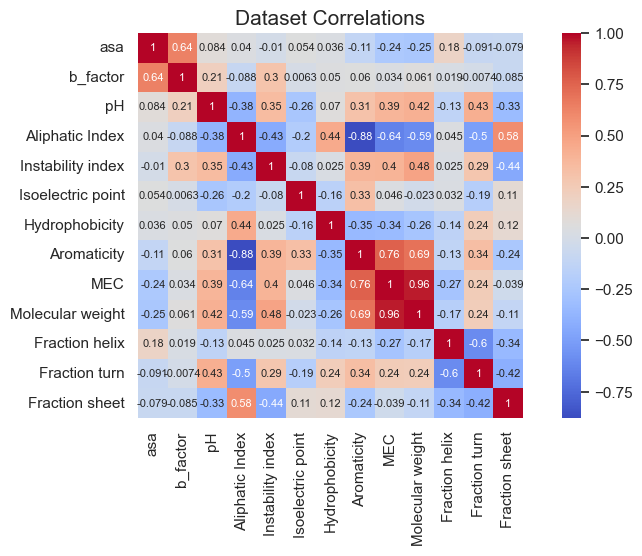

In [5]:
fig, ax = plt.subplots(nrows=1, figsize=(10, 5))  # ax an axs are different
sns.heatmap(df.drop(['sequence',
                     'protein_name',
                     'uniprot_id',
                     'secondary_structure',
                     'target_class',
                     'ddG',
                    ], axis=1).corr(), ax=ax, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 8})
ax.set_title('Dataset Correlations', size=15)
plt.show()

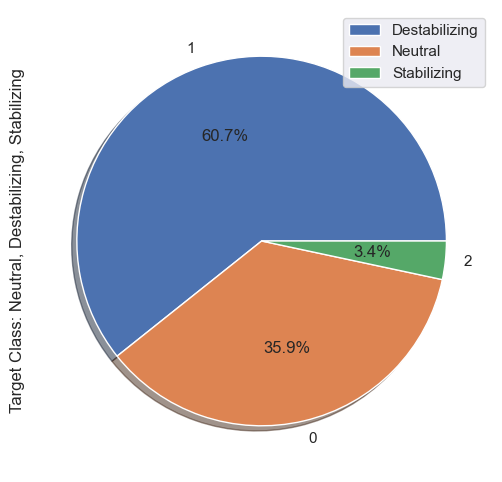

In [16]:
def pie_df(data):
    count = ""
    if isinstance(data, pd.DataFrame):
        count = data["target_class"].value_counts()
    else:
        count = data.value_counts()

    count.plot(kind = 'pie',
                figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
    plt.ylabel("Target Class: Neutral, Destabilizing, Stabilizing")
    plt.legend(["Destabilizing", "Neutral","Stabilizing"], loc= "upper right")
    plt.show()

pie_df(df)